In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
minst = tf.keras.datasets.mnist #loading the Mnist dataset
(train_x, train_y), (test_x, test_y) = minst.load_data() # Divide into train and test dataset

In [4]:
train_x.shape

(60000, 28, 28)

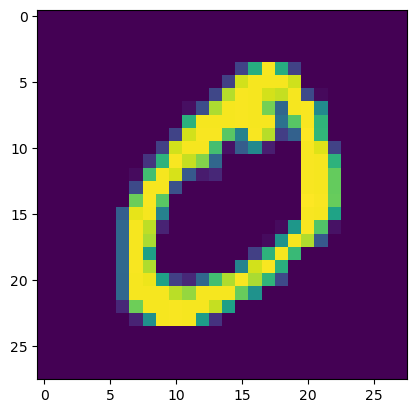

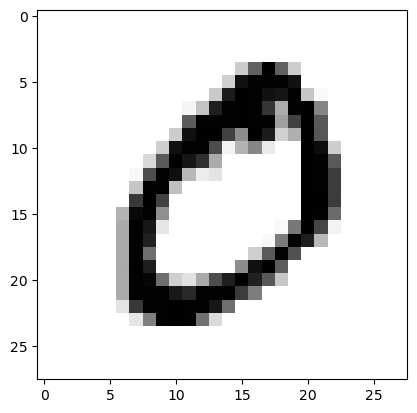

In [5]:
#checking the data
plt.imshow(train_x[1])
plt.show() #run the graph
plt.imshow(train_x[1], cmap=plt.cm.binary) #changing it to see the image

In [6]:
#checking the values of pixel by printing 
print(train_x[1]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

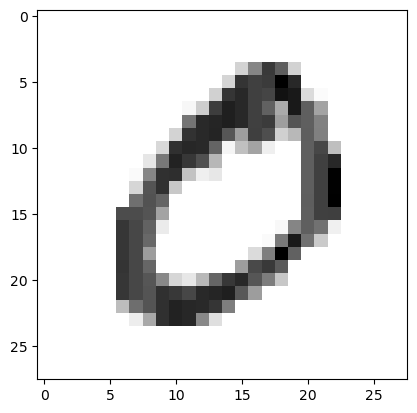

In [7]:
#normalize the data 
train_x = tf.keras.utils.normalize(train_x, axis = 1)
test_x = tf.keras.utils.normalize(test_x, axis = 1)
plt.imshow(train_x[1], cmap=plt.cm.binary) #changing it to see the image

In [8]:
print(train_x[1]) #print after normalized data

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(train_y[1]) 

0


In [10]:
#resizing the images 
SIZE = 28 #image size
newtrain_x = np.array(train_x).reshape(-1, SIZE, SIZE, 1) #increasing one dimension for kernel
newtest_x = np.array(test_x).reshape(-1, SIZE, SIZE, 1) 

In [11]:
print("Train: ", newtrain_x.shape)
print("Test: ", newtest_x.shape)

Train:  (60000, 28, 28, 1)
Test:  (10000, 28, 28, 1)


In [12]:
#CNN --> training on 60,000 data samples
model = Sequential()

#First Convolution layer 26x26
model.add(Conv2D(64, (3,3), input_shape = newtrain_x.shape[1:])) #input layer size (only have set once)
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling layerSequential()

In [13]:
#second Convolution layer 24x24
model.add(Conv2D(64, (3,3))) #input layer size
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling layer

#Third Convolution layer #24x24
model.add(Conv2D(64, (3,3))) #input layer size
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling layer

#1st Fully connected layer 20x20 = 400
model.add(Flatten()) #flatten the data from 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#2nd Fully connected layer 
model.add(Dense(32))
model.add(Activation("relu"))

#Last layer also know was classification -> output must be equal to 10 
model.add(Dense(10)) #10 b/c last dense layer
model.add(Activation("softmax")) #activation function using softmax

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total training samples: ", len(newtrain_x)) #print the training samples

Total training samples:  60000


In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [17]:
model.fit(newtrain_x, train_y,epochs = 10, validation_split = 0.3, batch_size = 1)

Epoch 1/10
42000/42000 [==============================] - 110s 3ms/step - loss: 0.2501 - accuracy: 0.9234 - val_loss: 0.1704 - val_accuracy: 0.9521
Epoch 2/10
42000/42000 [==============================] - 113s 3ms/step - loss: 0.1251 - accuracy: 0.9645 - val_loss: 0.1336 - val_accuracy: 0.9623
Epoch 3/10
42000/42000 [==============================] - 112s 3ms/step - loss: 0.1085 - accuracy: 0.9716 - val_loss: 0.1620 - val_accuracy: 0.9570
Epoch 4/10
42000/42000 [==============================] - 113s 3ms/step - loss: 0.1071 - accuracy: 0.9732 - val_loss: 0.1107 - val_accuracy: 0.9718
Epoch 5/10
42000/42000 [==============================] - 114s 3ms/step - loss: 0.1003 - accuracy: 0.9752 - val_loss: 0.1395 - val_accuracy: 0.9667
Epoch 6/10
42000/42000 [==============================] - 115s 3ms/step - loss: 0.1059 - accuracy: 0.9746 - val_loss: 0.1272 - val_accuracy: 0.9718
Epoch 7/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.1094 - accuracy: 0.9753 - val_

In [20]:
test = model.evaluate(newtest_x, test_y)
print("Test loss: ", test[0])
print("Test accuracy: ", test[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1452 - accuracy: 0.9642
Test loss:  0.14516451954841614
Test accuracy:  0.9642000198364258


In [19]:
model.save('model.h5')